Importing Data 

In [34]:
import pandas as pd 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(columns=['diagnosis'])
y_train = train['diagnosis']

X_test = test.drop(columns=['diagnosis'])
y_test = test['diagnosis']

Detailed Logistic Regression Analysis

No Skill: ROC AUC=0.413
Logistic: ROC AUC=0.500


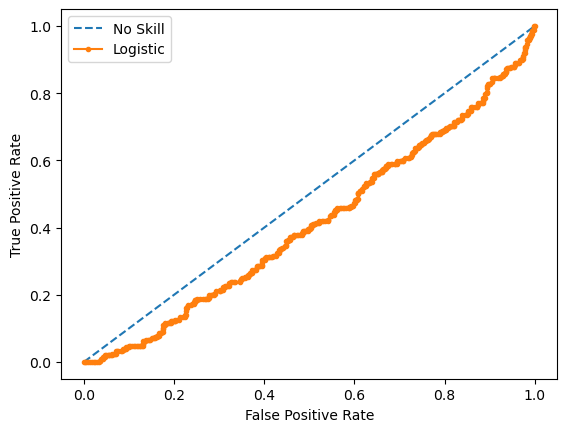

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, roc_curve, f1_score
from sklearn.metrics import auc
import matplotlib.pyplot  as plt 

model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
pos_probs = lr_probs[:, 1]
yhat = model.predict(X_test)

#ROC AUC CURVE 

auc_ = roc_auc_score(y_test, pos_probs)
auc_ns = roc_auc_score(y_test,ns_probs)

print('No Skill: ROC AUC=%.3f' % (auc_))
print('Logistic: ROC AUC=%.3f' % (auc_ns))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pos_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
plt.close()

Logistic: f1=0.210 auc=0.211


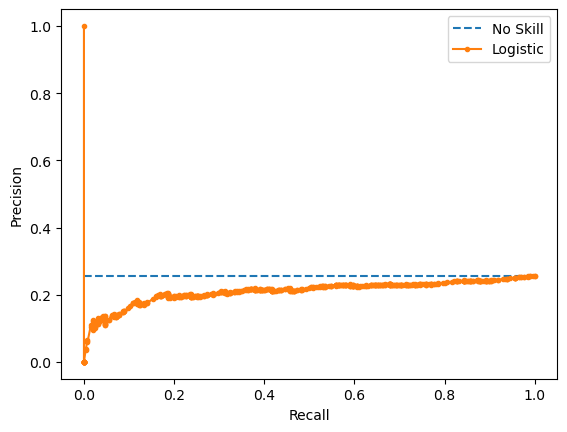

In [67]:
# Precision Recall Curve 
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

Appplying Other Models 

In [105]:
! pip install xgboost
! pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot  as plt 

Accuracy = {}
Recall = {}
Precision = {}
F1_score = {}

dictionary_of_models = {'LogisticRegression':LogisticRegression(random_state=8), 
                        'RandomForest':RandomForestClassifier(random_state=8),
                        'Xgboost':XGBClassifier(objective='binary:logistic', random_state=8)}

xg_boost_search_space = {
    'max_depth': Integer(2,12),
    'learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode' : Real(0.5, 1.0),
    'gamma': Real(0.0, 10.0)
}

for name, model in dictionary_of_models.items():
            if name == "Xgboost":
                    opt = BayesSearchCV(model,
                    xg_boost_search_space, n_iter=10, scoring='neg_log_loss', random_state=8) 
                    model = opt
                    
            dictionary_of_models[name] = model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            probs = model.predict_proba(X_test)
            pos_probs = probs[:, 1]
            Accuracy[name] =  accuracy_score(y_test,y_pred)
            Recall[name] = recall_score(y_test,y_pred)
            Precision[name] = precision_score(y_test,y_pred)
            F1_score[name] = f1_score(y_test,y_pred)

print("accuracy", Accuracy)
print("recall", Recall)
print("precision", Precision)
print("f1_score", F1_score)


            

accuracy {'LogisticRegression': 0.572, 'RandomForest': 0.561, 'Xgboost': 0.572}
recall {'LogisticRegression': 0.22265625, 'RandomForest': 0.21875, 'Xgboost': 0.19140625}
precision {'LogisticRegression': 0.1993006993006993, 'RandomForest': 0.18983050847457628, 'Xgboost': 0.1814814814814815}
f1_score {'LogisticRegression': 0.21033210332103322, 'RandomForest': 0.20326678765880216, 'Xgboost': 0.18631178707224336}


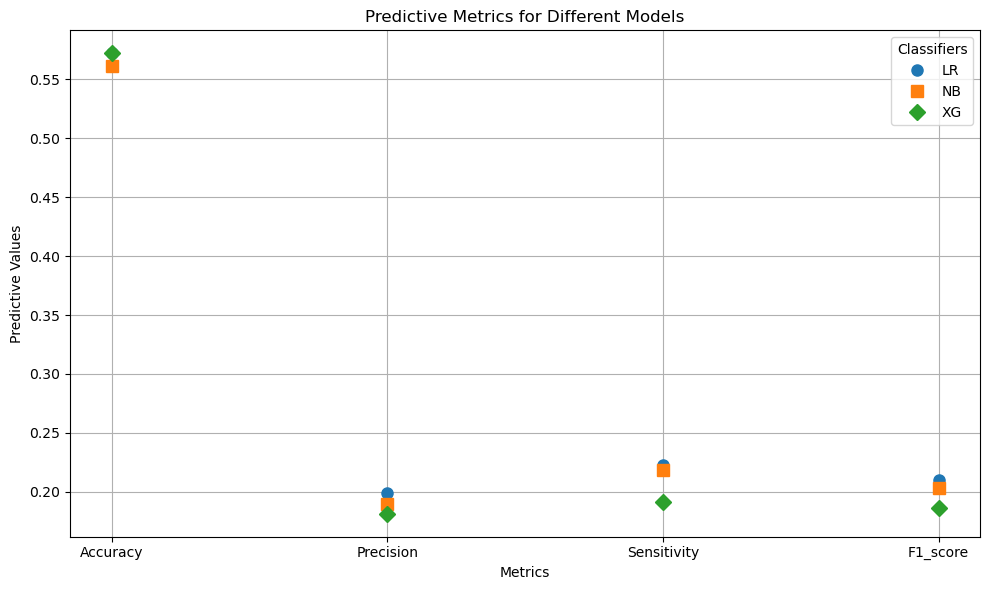

In [106]:
import matplotlib.pyplot as plt

markers = {
    'LR': 'o',   # Circle
    'NB': 's',   # Square
    'XG': 'D'    # Diamond
}
metrics = ['Accuracy', 'Precision', 'Sensitivity','F1_score']
classifiers = ['LR', 'RF', 'XG']

metric_values = {'LR': [Accuracy['LogisticRegression'],Precision['LogisticRegression'],Recall['LogisticRegression'],F1_score['LogisticRegression']],
                 'NB': [Accuracy['RandomForest'],Precision['RandomForest'],Recall['RandomForest'],F1_score['RandomForest']],
                 'XG': [Accuracy['Xgboost'],Precision['Xgboost'],Recall['Xgboost'],F1_score['Xgboost']]}

# Create the plot
plt.figure(figsize=(10, 6))

# Loop over classifiers and plot their metrics
for clf, marker in markers.items():
    plt.errorbar(
        metrics, metric_values[clf],
        fmt=marker, markersize=8, label=clf, capsize=5
    )

# Customize the plot
plt.xlabel('Metrics')
plt.ylabel('Predictive Values')
plt.title('Predictive Metrics for Different Models')
plt.legend(title='Classifiers', loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

